<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: A multivariate dataset on ENSO</h1>
  
<i> Last edited: February 2020</i>

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# load file
data = xr.open_dataset('../data/Eq_timelon_sections.nc',decode_times=False)
print(data)

<xarray.Dataset>
Dimensions:  (lon: 144, time: 240)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 ... 237.0 238.0 239.0 240.0
Data variables:
    olr      (time, lon) float32 ...
    precip   (time, lon) float32 ...
    slp      (time, lon) float32 ...
    sst      (time, lon) float32 ...
    uwnd     (time, lon) float32 ...


In [4]:
# load variable data from file
sst=data.sst
olr=data.olr
precip=data.precip
lon=data.lon
time=data.time
print(sst.shape,lon.shape,time.shape)

(240, 144) (144,) (240,)


### Can you find the El Ninos and La Ninas?

In [5]:
sst_anom = sst - sst.mean(dim='time')
print(sst_anom)

<xarray.DataArray 'sst' (time: 240, lon: 144)>
array([[ 0.871584,  1.160555,  1.139643, ...,  1.070618,  1.048704,  0.931259],
       [ 1.597586,  1.673555,  1.571642, ...,  1.427618,  1.623203,  1.60726 ],
       [ 2.129082,  1.866554,  1.592142, ...,  2.130619,  2.267202,  2.278259],
       ...,
       [-1.402914, -1.244444, -0.942858, ..., -1.213383, -1.546295, -1.474739],
       [-0.463413, -0.350445, -0.261862, ..., -0.72138 , -0.643795, -0.547743],
       [ 0.103588,  0.168556,  0.238642, ..., -0.072382,  0.094706,  0.156261]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 ... 237.0 238.0 239.0 240.0


In [6]:
# what does the time array look like?
print(time)

<xarray.DataArray 'time' (time: 240)>
array([  1.,   2.,   3., ..., 238., 239., 240.], dtype=float32)
Coordinates:
  * time     (time) float32 1.0 2.0 3.0 4.0 5.0 ... 237.0 238.0 239.0 240.0
Attributes:
    axis:       Y
    units:      months since 1982-01-01 00:00:00
    delta_t:    0000-01-00 00:00:00
    long_name:  Time


In [7]:
year_ticks = []
year=1982
for t in (time):
    if ((t-1) % 12 == 0): 
        year_ticks.append(str(year))
        year+=1
    #else:
    #    year_ticks.append('')
        
print(year_ticks,len(year_ticks))

['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001'] 20


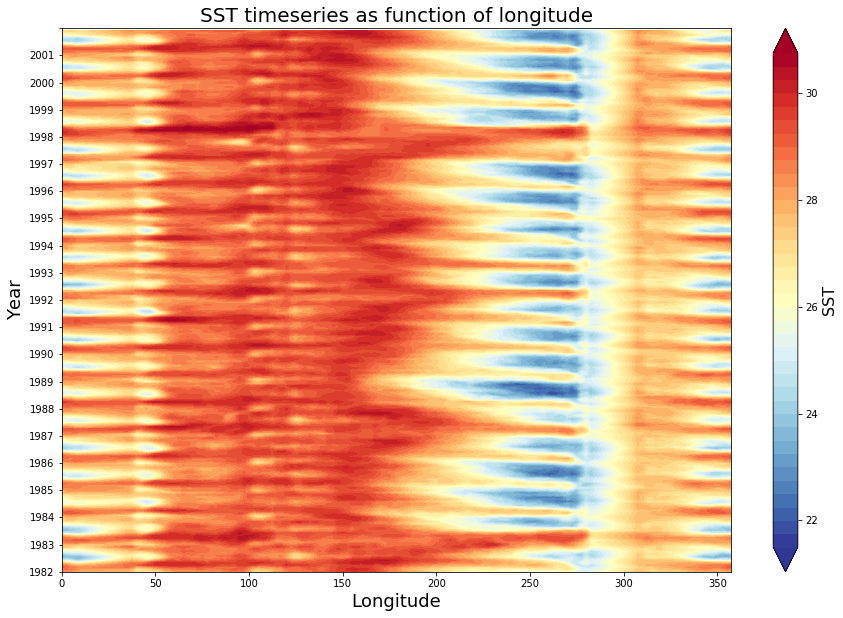

In [8]:
# plot timeseries of SST 
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)
cs = ax.contourf(lon,time,sst,40,cmap='RdYlBu_r',extend='both')
cb = plt.colorbar(cs,ticks=np.arange(20,30+2,2))
cb.set_label('SST',fontsize=16)
ax.set_yticks(np.arange(1,240+12,12))
ax.set_yticklabels(year_ticks)
ax.set_title('SST timeseries as function of longitude',fontsize=20)
ax.set_ylabel('Year',fontsize=18)
ax.set_xlabel('Longitude',fontsize=18)
plt.show()

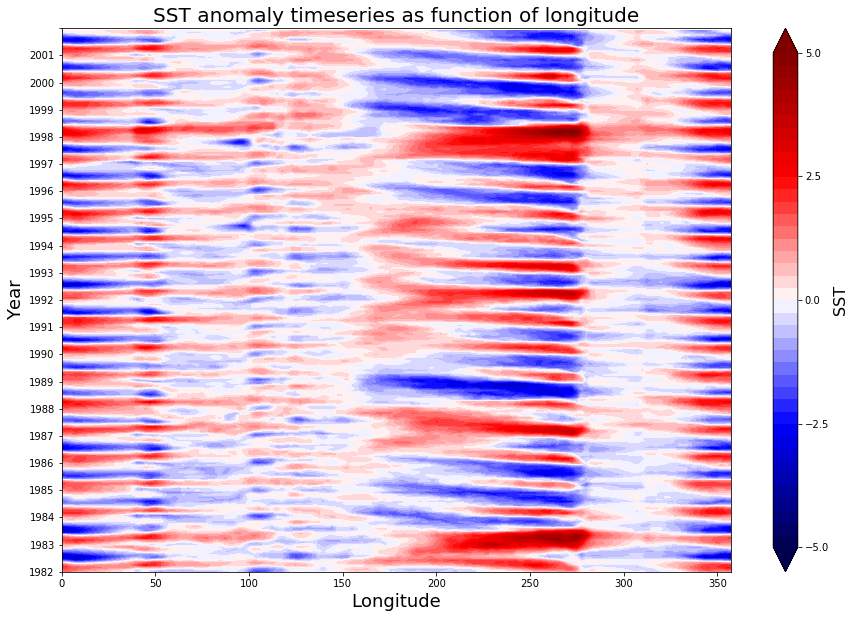

In [9]:
# plot timeseries of SST anomalies
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)
cs = ax.contourf(lon,time,sst_anom,np.arange(-5,5+.25,.25),cmap='seismic',extend='both')
cb = plt.colorbar(cs,ticks=np.linspace(-5,5,5))
cb.set_label('SST',fontsize=16)
ax.set_yticks(np.arange(1,240+12,12))
ax.set_yticklabels(year_ticks)
ax.set_title('SST anomaly timeseries as function of longitude',fontsize=20)
ax.set_ylabel('Year',fontsize=18)
ax.set_xlabel('Longitude',fontsize=18)
plt.show()

### Covariance matrix vs correlation matrix

In [10]:
cormat = np.corrcoef( np.transpose(sst_anom.values) )
covmat = np.cov( np.transpose(sst_anom.values) )
print(cormat.shape,covmat.shape)

(144, 144) (144, 144)


Text(0.5, 1.0, 'SST Anomaly Covariance Matrix')

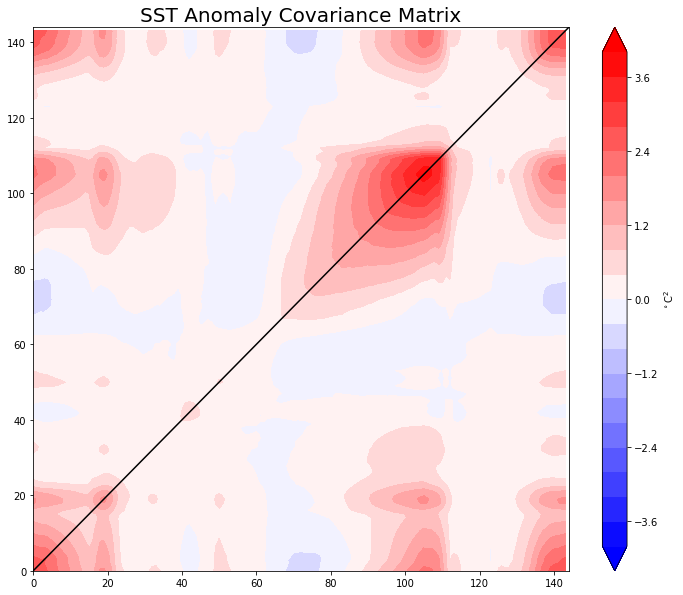

In [11]:
# covariance matrix
fig=plt.figure(figsize=[12,10])
ax=fig.add_subplot(111)
cs = ax.contourf(covmat,np.arange(-4,4+.4,.4),cmap='bwr',extend='both')
ax.plot([0,len(lon)],[0,len(lon)],'k')
ax.set_xlim([0,len(lon)])
ax.set_ylim([0,len(lon)])
plt.colorbar(cs,label='$^\circ$C$^2$')
ax.set_title('SST Anomaly Covariance Matrix',fontsize=20)

Text(0.5, 1.0, 'SST Correlation Matrix')

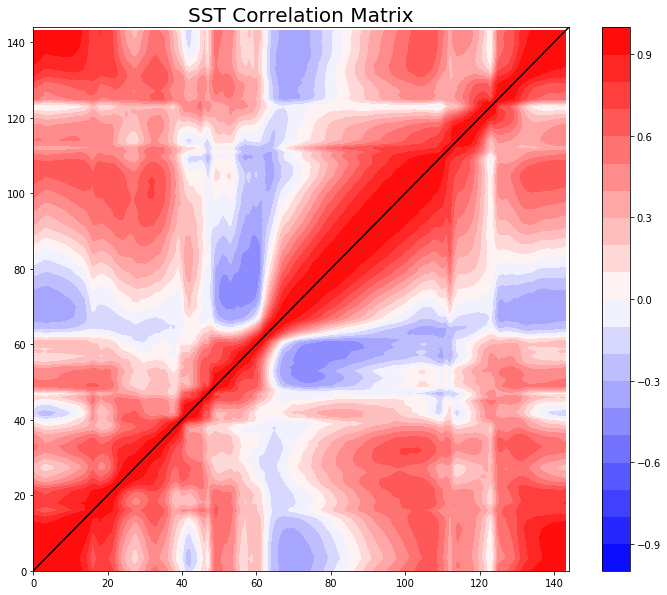

In [12]:
# correlation matrix
fig=plt.figure(figsize=[12,10])
ax=fig.add_subplot(111)
cs = ax.contourf(cormat,np.arange(-1,1+.1,.1),cmap='bwr')
ax.plot([0,len(lon)],[0,len(lon)],'k')
ax.set_xlim([0,len(lon)])
ax.set_ylim([0,len(lon)])
plt.colorbar(cs)
ax.set_title('SST Correlation Matrix',fontsize=20)

### Dividing into longitudinal chucks

Need to find a meaningful separation...
<br>
![alt text](http://www.compassdude.com/i/lat-lon-coordinate.gif "lon grid")

<br>
Let's try splitting up the ocean basins.


In [13]:
Pac_lon_bnds, Atl_lon_bnds, Ind_lon_bnds = [150,360-90],[360-90,30],[30,150] 
print(Pac_lon_bnds[1]-Pac_lon_bnds[0],(360-Atl_lon_bnds[0])+Atl_lon_bnds[1],Ind_lon_bnds[1]-Ind_lon_bnds[0])

120 120 120


In [14]:
# slice according to longitude 
# Pac_sst_anom = sst_anom.sel(lon=slice(*Pac_lon_bnds))
# Atl_sst_anom = sst_anom.sel(lon=(lon >= Atl_lon_bnds[0]) | (lon <= Atl_lon_bnds[1]))
# Ind_sst_anom = sst_anom.sel(lon=slice(*Ind_lon_bnds))
# print(Pac_sst_anom.shape,Atl_sst_anom.shape,Ind_sst_anom.shape)

In [15]:
# or use ravel(), this looks rather manual

# Pac_sst_anom = Pac_sst_anom.values.reshape(Pac_sst_anom.shape[0]*Pac_sst_anom.shape[1])
# Atl_sst_anom = Atl_sst_anom.values.reshape(Atl_sst_anom.shape[0]*Atl_sst_anom.shape[1])
# Ind_sst_anom = Ind_sst_anom.values.reshape(Ind_sst_anom.shape[0]*Ind_sst_anom.shape[1])
# print(Pac_sst_anom.shape,Atl_sst_anom.shape,Ind_sst_anom.shape)

In [16]:
# # slice according to longitude 
Pac_sst,Pac_olr,Pac_precip = sst.sel(lon=slice(*Pac_lon_bnds)),olr.sel(lon=slice(*Pac_lon_bnds)),precip.sel(lon=slice(*Pac_lon_bnds))
Atl_sst,Atl_olr,Atl_precip = sst.sel(lon=(lon >= Atl_lon_bnds[0]) | (lon <= Atl_lon_bnds[1])),olr.sel(lon=(lon >= Atl_lon_bnds[0]) | (lon <= Atl_lon_bnds[1])),precip.sel(lon=(lon >= Atl_lon_bnds[0]) | (lon <= Atl_lon_bnds[1]))
Ind_sst,Ind_olr,Ind_precip = sst.sel(lon=slice(*Ind_lon_bnds)),olr.sel(lon=slice(*Ind_lon_bnds)),precip.sel(lon=slice(*Ind_lon_bnds))
print(Pac_sst.shape,Atl_sst.shape,Ind_sst.shape)

(240, 49) (240, 49) (240, 49)


In [17]:
# taking mean across longitudinal band

Pac_sst,Pac_olr,Pac_precip = Pac_sst.mean(dim='lon'),Pac_olr.mean(dim='lon'),Pac_precip.mean(dim='lon')
Atl_sst,Atl_olr,Atl_precip = Atl_sst.mean(dim='lon'),Atl_olr.mean(dim='lon'),Atl_precip.mean(dim='lon')
Ind_sst,Ind_olr,Ind_precip = Ind_sst.mean(dim='lon'),Ind_olr.mean(dim='lon'),Ind_precip.mean(dim='lon')
print(Pac_sst.shape,Atl_sst.shape,Ind_sst.shape)

(240,) (240,) (240,)


### Different Scatterplots using seaborn

In [68]:
# setting up a dataframe where the rows are time and columns are basin
d1,d2,d3 = {'Pacific': Pac_sst, 'Atlantic': Atl_sst, 'Indian': Ind_sst},{'Pacific': Pac_olr, 'Atlantic': Atl_olr, 'Indian': Ind_olr},{'Pacific': Pac_precip, 'Atlantic': Atl_precip, 'Indian': Ind_precip}
df1,df2,df3 = pd.DataFrame(d1,dtype=float),pd.DataFrame(d2,dtype=float),pd.DataFrame(d3,dtype=float)
df1,df2,df3 = df1.rename_axis('basin',axis='columns'),df2.rename_axis('basin',axis='columns'),df3.rename_axis('basin',axis='columns')
df2

basin,Pacific,Atlantic,Indian
0,257.318573,231.386353,227.331314
1,249.864517,224.313217,235.539337
2,244.270706,226.408936,231.804214
3,245.846817,222.307281,229.630783
4,256.318787,230.359894,224.881653
...,...,...,...
235,258.397675,255.475388,230.520874
236,262.496246,249.096115,229.141998
237,259.427612,244.005066,228.504990
238,256.111237,242.324158,222.135345


In [69]:
s1,s2,s3=df1.stack(),df2.stack(),df3.stack()
s1.name,s2.name,s3.name='sst','olr','precip'
df_tidy1,df_tidy2,df_tidy3=s1.reset_index(),s2.reset_index(),s3.reset_index()
df_tidy1,df_tidy2,df_tidy3=df_tidy1.drop(columns=['level_0']),df_tidy2.drop(columns=['level_0']),df_tidy3.drop(columns=['level_0'])
df_tidy3

,basin,precip
0,Pacific,2.570612
1,Atlantic,4.767245
2,Indian,6.095051
3,Pacific,4.151429
4,Atlantic,5.731071
...,...,...
715,Atlantic,3.069388
716,Indian,6.896939
717,Pacific,5.328164
718,Atlantic,3.197296


In [71]:
df_all = pd.concat([df_tidy1,df_tidy2,df_tidy3],axis=1,ignore_index=True)
df_all = df_all.drop(columns=[2,4])
df_all = df_all.rename(columns={0: "basin", 1: "sst", 3: "olr", 5: "precip"})
df_all

,basin,sst,olr,precip
0,Pacific,27.133224,257.318573,2.570612
1,Atlantic,27.108343,231.386353,4.767245
2,Indian,28.220350,227.331314,6.095051
3,Pacific,27.383625,249.864517,4.151429
4,Atlantic,27.385105,224.313217,5.731071
...,...,...,...,...
715,Atlantic,26.481012,242.324158,3.069388
716,Indian,29.014133,222.135345,6.896939
717,Pacific,26.617683,241.414185,5.328164
718,Atlantic,26.652090,240.809555,3.197296


In [72]:
df_all.shape

(720, 4)

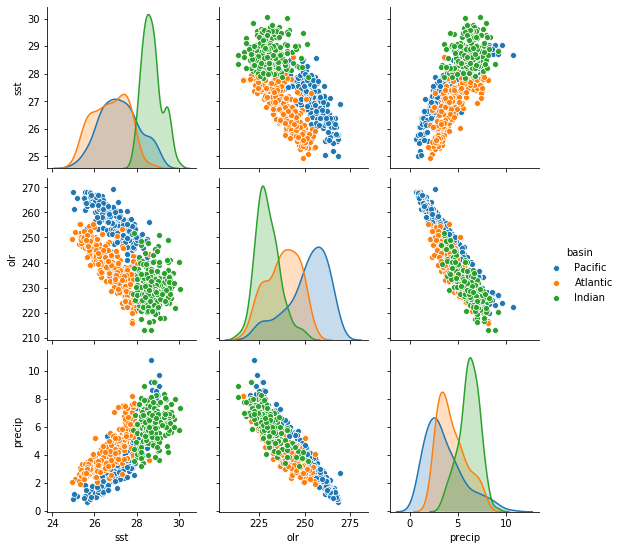

In [73]:
sns.pairplot(df_all,diag_kind="kde",hue='basin', dropna=True)